## Version RASSIFIEE

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import src.basic_function_cap as bfc

In [3]:
means = np.load('means.npy')
means.shape

(816, 88, 3)

In [9]:
octave = 0
notes = ['la','la#','si','do','do#','re','re#','mi','fa','fa#','sol','sol#']
name_notes = []
for i in range(88):
    if notes[i%12] == 'do':
        octave += 1
    name_notes.append(notes[i%12]+str(octave))

In [25]:
def show(frame):
    plt.figure(figsize=(20,6))
    plt.plot(means[frame])
    plt.xticks(range(88), name_notes, rotation=90)
    plt.show()

interact(show, frame=widgets.IntSlider(min=0,max=means.shape[0]-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='frame', max=815), Output()), _dom_classes=('widget-inter…

<function __main__.show(frame)>

In [26]:
# get means of rgb for each frame and each key
meansRGB = np.zeros((means.shape[0],means.shape[1]))
for i in range(means.shape[0]):
    meansRGB[i] = np.mean(means[i], axis=1)

In [35]:
def show(frame):
    plt.figure(figsize=(20,6))
    plt.plot(meansRGB[frame])
    plt.scatter(range(88), meansRGB[frame], c=meansRGB[frame])
    for i in range(88):
        if meansRGB[frame][i] > 20:
            plt.text(i, meansRGB[frame][i], name_notes[i])
    plt.show()

interact(show, frame=widgets.IntSlider(min=0,max=means.shape[0]-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='frame', max=815), Output()), _dom_classes=('widget-inter…

<function __main__.show(frame)>

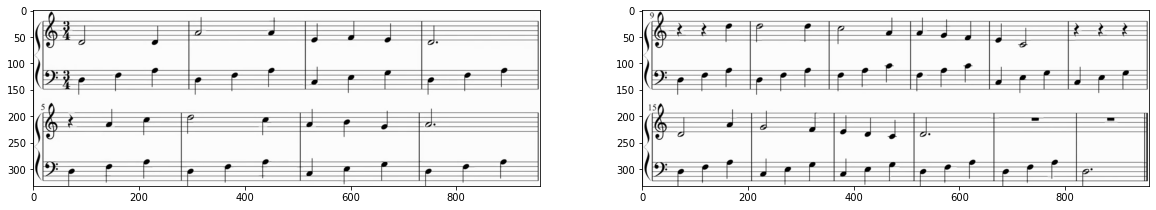

interactive(children=(IntSlider(value=0, description='frame', max=815), Output()), _dom_classes=('widget-inter…

<function __main__.show(frame)>

In [58]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img1 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
_, frame = bfc.get_frame(cap, 700)
img2 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
# show img1 and img2 left and right
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

def show(frame):
    plt.figure(figsize=(20,5))
    plt.plot(range(20,61), meansRGB[frame][20:61])
    plt.ylim(0,255)
    plt.scatter(range(20,61), meansRGB[frame][20:61], c=meansRGB[frame][20:61])
    for i in range(20,61):
        if meansRGB[frame][i] > 20:
            plt.text(i, meansRGB[frame][i], name_notes[i])
    plt.show()

interact(show, frame=widgets.IntSlider(min=0,max=means.shape[0]-1,step=1,value=0))